## 4. Regression: Optimization of Long-Term Correction of Wind Data Using Regression Models

**Assignment Description**

In this assignment, you will work with realistic data from the wind industry. Vestas, a leading global company in wind energy, is interested in optimizing their methods for generating long-term corrected (LTC) wind data, which are used for planning the locations of new wind farms.

**Context**

Before building a new wind farm, Vestas needs to get an estimate of how much power it can produce. This can be done by running a simulation of the planned wind farm. The primary factors that decide how much power will be produced are: 

-  the turbine type (bigger turbines generally produce more energy), 

- the locations of the turbines (more energy is produced if the turbines are placed so that they do not block each other significantly) and 

- the wind speed and wind direction at the location where the wind farm is planned to be build. 

The turbine type and location is something that Vestas engineers get to decide, but wind is not so easily managed... Therefore, it is important to have a large amount of data to get a precise description of the distribution of wind speeds and wind directions at the potential site. Ideally a wind measuring mast would be build at the place of interest and collect data on wind speeds and wind directions for 20 years or so prior to the wind farm being build. However, the investers would probably become impatient if they had to wait for 20 years before construction could begin. 

So instead, a mast is build that collects data for a few years (typically 1-4 years). To account for more "global" variations in wind from year to year (some years are simply more windy than other years), the data from the mast is then compared to the data based on wind models which covers a much longer time scale. This model data (referred to as "meso" data) can be obtained for any location on Earth, and accounts for large scale wind variations (e.g. due to seasons, geography, Coriolis effect etc.). But it cannot be expected to give a precise description of the wind at a specific location, which is also affected by vegetation, buildings, the local landscape and so on. So in summary, the mast data captures the specific wind conditions for the given site, and the meso data accounts for variations in wind speeds on a longer time scale. Together, the two datasets usually give a good description of the wind at a specific site over a long time period, and therefore can be used to predict the expected power production over a long time span (e.g. 20 years, comparable to the life time of a wind farm).

Below is an illustration comparing a meso and a mast time series. Note that this plot is only for illustration purposes. In reality, meso data typically has a frequency of 1 hour, and mast data has a frequency of 10 minutes. Besides, the figure only illustrates the variations in windspeeds. For the actual simulations, wind directions are also extremely important (e.g. to determine the locations of the turbines such that they don't block each other for the prevalent wind directions).

![Illustration of meso vs mast time series](timeseries_example.png)

In order to run a simulation for a given (potential) site, Vestas needs to obtain a single time series which has the same characteristics as the mast timeseries, but has a time span of 20 years like the meso time series. For this purpose, they currently use a neural network: They train the network on the overlapping parts of the mast and meso time series. Specifically, they train the network to be able to predict the mast wind speeds and wind directions based on the wind speeds and wind directions found in the meso data for the same time stamps. After the neural network has been trained, they feed the meso wind speeds and wind directions for the entire 20 years time span to get a *predicted* "mast" time series covering the 20 years of data found in the meso data. This *predicted* mast time series is called the "long term corrected" (LTC) time series, and is the one on which they base their simulations for the power production at the given site. 

However, traning neural networks is time consuming and expensive! Therefore, Vestas is curious if some kind of linear regression would be able to acheive comparable results. 

**Data**
 
You will have access to two types of time series data:

1) Mast time series data that represent the wind conditions at a specific location based on measurements from a wind measuring mast.

2) Meso time series data that are based on weather measurement models and cover more than 20 years. While these data are less precise and don't exactly match the specific location, they provide a longer historical context.

Note that the mast data for this project is significantly longer than "typical" mast data. This allows cutting the data into training and test sets (or training, validation and test sets). Each set should cover all four seasons.

Your task is to develop a model using regression techniques that can generate LTC wind data. This LTC time series should be long, like the meso time series, but also give an accurate description of the wind conditions at the specific location.

**Objectives and Purpose**
 
The purpose of the assignment is to assess whether regression could be used instead of neural networks, which could potentially save time and money as it is generally quicker to perform a regression than to train a neural network. And the main objective is thus to develop a regression model that can generate LTC time series that are both accurate and cost-effective.

**Requirements**

Please note. We have supplied some examples of how students have previously done the preprocessing to give you some input and thus make the work load a bit less. Feel free to use/reuse the preprocessing steps of these solutions.

1. **Data preprocessing:** You must handle large datasets and perform necessary data preprocessing tasks. This includes dealing with missing values, handling outliers, and scaling data appropriately for the chosen regression technique. Feel free to use or get inspired by previous solutions.

    a. Consider the appropriate intervals for wind speeds and wind directions. No negative wind speeds are allowed, and wind directions should be in an appropriate interval (e.g. [0; 360[ degrees).

    b. Select which ws / wd signals to use. Signals at higher altitude are generally better, but it is even more important to have proper coverage of all seasons.

    c. Find the meso-signals closest in height to the mast-data-signal you are using. Or interpolate the values between 2 or more meso-signals to get the values at the exact mast-signal-height.

    d. Convert the mast data from DK time to UTC time (corresponding to the time zone used in the meso data). Remember to account for summer-time in DK.
    
    e. Resample the mast dataset to have the same frequency as the meso data. The meso data has one record for each hour, the mast data has one record for each 10 min.

        i. Note: You should not convert the ws / wd signals to vector-quantities and use those for the resampling. Resample the ws and wd signal individually instead. The turbines “yaw” to always point toward the incoming wind, so the interesting value is the wind speed and not the wind velocity.  
        ii. Be careful when resampling the wind directions. You don’t want the average of 0 degrees and 359 degrees to become ~180 degrees :-)

    f. Find the overlapping timestamps between the meso data and the resampled mast data. You only want to consider data in this overlapping time period in your training.

2. **Optional: Exploratory analysis:** You may do an exploratory analysis of the data, but this part is not mandatory. This includes presenting the data in tables and graphs, study and describe features of interest, as well as correlation analysis. Wind speeds typically follow a Weibull-distributions. Try fitting a Weibull distribution to the mast data, the resampled mast data and the meso-data. **(You can skip this part if you want to)**
3. **Model Development:** Use appropriate machine learning principles and methodologies, including model training and testing and perhaps validation, cross-validation, and leave-one-out. You should apply and interpret regression models effectively for this task.
4. **Model Evaluation:** Evaluate the developed model using appropriate metrics such as Mean Squared Error (MSE), R-squared (R²), etc. The evaluation should give an indication of the usefulness of your model in predicting wind conditions accurately. 
**Optional**: If you did step 2 above, in addition to calculating the above metric for your predicted time series, also consider comparing the distributions of the wind speeds in the predicted and the actual (resampled) mast data. That is, calculate the Weibull A- and k-parameters for both distributions, and find the error in these between your fit and the true data. "Error-in-A" and "Error-in-k" are the most used quantities to evaluate the long term correction process in the wind industry :-)
5. **Documentation and Presentation:** Clearly document the steps, methodologies, and tools you used during the process. Present the results of your model in a clear and effective manner. This documentation should be comprehensive enough for someone to replicate your process and understand your results. Hand-in as one Jupyter Notebook.


**Some additional comments**

They (Vestas) have also tried running their own LTC algorithm on some of the data (they chose the 77m wind speed and wind direction signals from the Risø dataset), and this yielded good results. They assumed that the data was in Danish time, so they believe that is the case.

As you can see, there is quite a focus on wind speeds (as they determine the amount of power produced). However, they know that their neural network operates by training on the different components of wind speed separately (meaning training one network on the x-component of the wind and another network on the y-component of the wind) and then combining them at the end. You may consider this method too. They are not sure if it yields better performance than training on wind speed and wind direction separately...but if time permits, give it a go.

**About the data**

The mast datasets are in netCDF format. It's quite easy to work with in Python (not sure if you've used it before?). In one of the folders, a test.py file is included that demonstrate how to load the dataset and access the most relevant mast signals.

The mast data has a measurement frequency of 10 minutes, while the meso data has a frequency of 1 hour. Therefore, you will need to resample the mast data to a 1-hour frequency before you can use it (see requirement 1.e above). Vestas does the same with their data. As mentioned you should be careful when resampling the angles so that the average of 0 degrees (north) and 359 degrees doesn't end up being approximately 180 degrees.

The data is publicly available. You can read more about it here:

*Risø:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/risoe_m.md

Data: https://data.dtu.dk/articles/dataset/Wind_resource_data_from_the_tall_Ris_met_mast/14153204 (this is the "DOI"-link from the description)


*Børglum:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/borglum.md

Data: https://data.dtu.dk/articles/dataset/Resource_data_from_the_Borglum_mast/14153231

The two meso datasets come from Vestas' climate library, and the meso data is in UTC time. They don't think you need anything other than the "wind speed" (WSP) and "wind direction" (WDIR) signals. They believe it's most appropriate to either use the height closest to the mast height (for example, if you're using the wind speed signal ws125 and the wind direction signal wd125 from the Risø dataset, you should use WSP120 and WDIR120 from the meso dataset) or use multiple signals and interpolate to the desired height (125m) (see the requirements above).

**Final comments**

In a perfect world, you can do all of the above. The assignment is "free" in the sense that you should give the above a go and do your best. Remember, there is no right answer. This assignment is a real-world machine learning task and not a "made-up" school task. There are software engineers at Vestas working on exactly the same task (albeit with a different dataset, which they arent' allowed to share with us). But try to discuss the problem in your group and distribute the work among you. You can even collaborate with other groups or find inspiration in their approach.

And remember. These portfolio assignments are not meant as "learn stuff in class and apply to assignment" - they are part of the learning process, and not simply a documentation of what you have learned. They should be seen as "learning by doing"-type assignments.

In session 8, we will do a Q/A if you have any questions. But as mentioned, try to give it a go. 

# 1. Insert the data processing

In [1]:
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
file_path_borglum = 'Data/Borglum/borglum_all.nc'

dataset = nc.Dataset(file_path_borglum,'r')

In [3]:
# as we have found out the qc values are either 0 or nan. So we guess it means quality control
# and we think we can remove those

# lets convert data to dataframe
column_names = []
for var_name in dataset.variables:
    column_names.append(var_name)
    
df_data = pd.DataFrame()
for column_name in column_names:
    tmp_np = np.array(dataset.variables[column_name])
    df_data[column_name] = tmp_np
df_data.describe()

,time,ws32,ws32_qc,ws20,ws20_qc,ws10,ws10_qc,wd10,wd10_qc,wd32,...,td10_2,td10_2_qc,td30_10,td30_10_qc,rhum,rhum_qc,grad,grad_qc,press,press_qc
count,2.122790e+05,211046.000000,211046.0,198670.000000,198670.0,206247.000000,206247.0,212270.000000,212270.0,204907.000000,...,212279.000000,212279.0,212279.000000,212279.0,212276.000000,212276.0,212279.000000,212279.0,205453.000000,205453.0
mean,1.067308e+06,6.618591,0.0,6.027335,0.0,5.443917,0.0,182.720479,0.0,185.061560,...,0.139489,0.0,0.054420,0.0,81.749322,0.0,112.399173,0.0,1009.414265,0.0
std,6.171817e+05,3.299422,0.0,3.172190,0.0,3.008973,0.0,91.017378,0.0,90.418746,...,0.683429,0.0,0.599545,0.0,14.878764,0.0,178.268002,0.0,11.623661,0.0
min,0.000000e+00,0.120000,0.0,0.100000,0.0,0.100000,0.0,0.000000,0.0,0.000000,...,-2.740000,0.0,-2.330000,0.0,0.000000,0.0,0.000000,0.0,954.700000,0.0
25%,5.306950e+05,4.240000,0.0,3.730000,0.0,3.200000,0.0,113.000000,0.0,117.000000,...,-0.130000,0.0,-0.210000,0.0,74.000000,0.0,15.000000,0.0,1002.160000,0.0
50%,1.071720e+06,6.080000,0.0,5.520000,0.0,4.970000,0.0,188.000000,0.0,192.000000,...,0.050000,0.0,-0.120000,0.0,84.000000,0.0,20.000000,0.0,1009.920000,0.0
75%,1.602415e+06,8.590000,0.0,7.950000,0.0,7.280000,0.0,262.000000,0.0,261.000000,...,0.280000,0.0,0.110000,0.0,95.000000,0.0,124.000000,0.0,1017.170000,0.0
max,2.133110e+06,26.260000,0.0,25.280000,0.0,23.550000,0.0,360.000000,0.0,360.000000,...,6.910000,0.0,8.730000,0.0,98.000000,0.0,1116.000000,0.0,1396.950000,0.0


In [4]:
df_data = df_data.dropna()
df_data.describe()

,time,ws32,ws32_qc,ws20,ws20_qc,ws10,ws10_qc,wd10,wd10_qc,wd32,...,td10_2,td10_2_qc,td30_10,td30_10_qc,rhum,rhum_qc,grad,grad_qc,press,press_qc
count,1.876850e+05,187685.000000,187685.0,187685.000000,187685.0,187685.000000,187685.0,187685.000000,187685.0,187685.000000,...,187685.000000,187685.0,187685.000000,187685.0,187685.000000,187685.0,187685.000000,187685.0,187685.000000,187685.0
mean,1.077894e+06,6.568099,0.0,6.026508,0.0,5.416601,0.0,181.244836,0.0,182.505602,...,0.132310,0.0,0.052818,0.0,81.663116,0.0,117.611621,0.0,1009.401590,0.0
std,6.111101e+05,3.256324,0.0,3.177134,0.0,2.980523,0.0,91.045161,0.0,90.315178,...,0.695041,0.0,0.601651,0.0,15.061845,0.0,182.694232,0.0,11.550644,0.0
min,4.744000e+04,0.120000,0.0,0.100000,0.0,0.100000,0.0,0.000000,0.0,0.000000,...,-2.740000,0.0,-2.330000,0.0,0.000000,0.0,0.000000,0.0,968.270000,0.0
25%,5.282200e+05,4.240000,0.0,3.730000,0.0,3.200000,0.0,111.000000,0.0,114.000000,...,-0.130000,0.0,-0.210000,0.0,74.000000,0.0,15.000000,0.0,1002.170000,0.0
50%,1.086420e+06,6.030000,0.0,5.520000,0.0,4.940000,0.0,187.000000,0.0,189.000000,...,0.050000,0.0,-0.120000,0.0,84.000000,0.0,20.000000,0.0,1009.910000,0.0
75%,1.620740e+06,8.520000,0.0,7.970000,0.0,7.240000,0.0,261.000000,0.0,260.000000,...,0.280000,0.0,0.110000,0.0,95.000000,0.0,135.000000,0.0,1017.020000,0.0
max,2.133110e+06,26.260000,0.0,25.280000,0.0,23.550000,0.0,360.000000,0.0,360.000000,...,6.910000,0.0,8.730000,0.0,98.000000,0.0,1116.000000,0.0,1396.950000,0.0


In [5]:
df_data.columns.values

#remove qc columns
df_cols_to_drop = []
for col in df_data.columns.values:
    if col.endswith("_qc"):
        df_cols_to_drop.append(col)
        
df_mast = df_data.drop(df_cols_to_drop, axis=1)

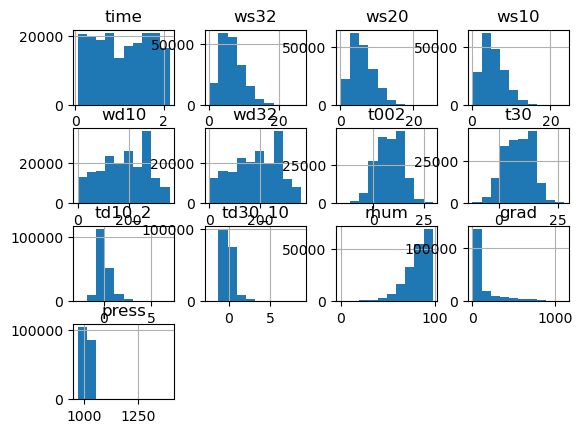

In [6]:
#histogram for all mast columns
df_mast.hist()
print("")

,ws32,ws20,ws10,wd10,wd32,t002,t30,td10_2,td30_10
ws32,1.000000,0.984009,0.986521,NaN,NaN,NaN,NaN,NaN,NaN
ws20,0.984009,1.000000,0.984437,NaN,NaN,NaN,NaN,NaN,NaN
ws10,0.986521,0.984437,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
wd10,NaN,NaN,NaN,1.000000,0.944028,NaN,NaN,NaN,NaN
wd32,NaN,NaN,NaN,0.944028,1.000000,NaN,NaN,NaN,NaN
t002,NaN,NaN,NaN,NaN,NaN,1.000000,0.981016,NaN,NaN
t30,NaN,NaN,NaN,NaN,NaN,0.981016,1.000000,NaN,NaN
td10_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.760761
td30_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.760761,1.000000


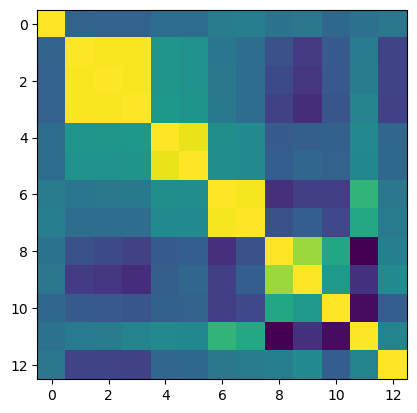

In [7]:
plt.imshow(df_mast.corr())
# display only columns with correlation higher than 0.75
my_corr = df_mast.corr()
my_corr[my_corr > 0.75].dropna(thresh=2).dropna(thresh=2, axis=1)

In [8]:
# convert time from mast to timestamp
base_date_borglum = datetime(1997, 12, 11, 16, 5, 0)
base_date_risoe = datetime(1995, 11, 20, 16, 25, 0)

def time_convert(input):
    time_delta = timedelta(minutes=int(input))
    timestamp = base_date_borglum + time_delta
    return pd.to_datetime(timestamp)
    # return timestamp.strftime('%Y-%m-%d %H:%M:%S')


for index, row in df_mast.iterrows():
    time = row['time']
    time_stamp = time_convert(time)
    df_mast.at[index, 'TIMESTAMP'] = time_stamp

df_mast['TIMESTAMP'] = pd.to_datetime(df_mast['TIMESTAMP'])

In [9]:
#we chose to use ws and wd for height 125 in mast so all the other columns that are no longer relevant are dropped

df_mast.head(10)
df_mast_just_wind = df_mast.drop(['time','ws20','ws10','wd10','t002','t30','td10_2','td30_10','press','rhum','grad'], axis=1)
df_mast_just_wind.head()

,ws32,wd32,TIMESTAMP
4744,3.04,128.0,1998-01-13 14:45:00
4745,3.54,116.0,1998-01-13 14:55:00
4746,3.77,113.0,1998-01-13 15:05:00
4747,3.97,116.0,1998-01-13 15:15:00
4748,4.47,117.0,1998-01-13 15:25:00


In [10]:
#creating a season column based on timestamp
df_mast_wind_month = df_mast_just_wind.copy()

df_mast_wind_month.dtypes

print(((df_mast['TIMESTAMP'].dt.month + 1) // 4) + 1)
df_mast_wind_month['season'] = ((df_mast['TIMESTAMP'].dt.month + 1) // 4) + 1
df_mast_wind_month['year'] = df_mast['TIMESTAMP'].dt.year

df_mast_wind_month.head(10)

4744      1
4745      1
4746      1
4747      1
4748      1
         ..
212274    4
212275    4
212276    4
212277    4
212278    4
Name: TIMESTAMP, Length: 187685, dtype: int32


,ws32,wd32,TIMESTAMP,season,year
4744,3.04,128.0,1998-01-13 14:45:00,1,1998
4745,3.54,116.0,1998-01-13 14:55:00,1,1998
4746,3.77,113.0,1998-01-13 15:05:00,1,1998
4747,3.97,116.0,1998-01-13 15:15:00,1,1998
4748,4.47,117.0,1998-01-13 15:25:00,1,1998
4749,3.70,117.0,1998-01-13 15:35:00,1,1998
4750,4.04,121.0,1998-01-13 15:45:00,1,1998
4751,4.57,119.0,1998-01-13 15:55:00,1,1998
4752,5.71,128.0,1998-01-13 16:05:00,1,1998
4753,4.88,129.0,1998-01-13 16:15:00,1,1998


In [11]:
#set the wind direction to 0 if 360 to avoid the avg becoming 180; also 0 and 360 are kind of the same thing
df_mast_wind_month.loc[df_mast_wind_month['wd32'] == 360, 'wd32'] = 0

df_mast_wind_month.describe()

,ws32,wd32,TIMESTAMP,season,year
count,187685.000000,187685.000000,187685,187685.000000,187685.000000
mean,6.568099,182.304201,1999-12-30 04:58:53.430482176,2.500930,1999.496001
min,0.120000,0.000000,1998-01-13 14:45:00,1.000000,1998.000000
25%,4.240000,114.000000,1998-12-13 11:45:00,2.000000,1998.000000
50%,6.030000,189.000000,2000-01-05 03:05:00,2.000000,2000.000000
75%,8.520000,260.000000,2001-01-10 04:25:00,3.000000,2001.000000
max,26.260000,359.000000,2001-12-31 23:55:00,4.000000,2001.000000
std,3.256324,90.320541,NaN,0.933223,1.136869


In [12]:
#create columns for east and north based on cartesian coordinates for the wind speed and wind direction
df_mast_wind_month_cartesian = df_mast_wind_month.copy()

df_mast_wind_month_cartesian['east'] = df_mast_wind_month_cartesian['ws32'] * np.sin((df_mast_wind_month_cartesian['wd32']/360) * 2*np.pi)
df_mast_wind_month_cartesian['north'] = df_mast_wind_month_cartesian['ws32'] * np.cos((df_mast_wind_month_cartesian['wd32']/360) * 2*np.pi)

df_mast_wind_month_cartesian.head(10)

,ws32,wd32,TIMESTAMP,season,year,east,north
4744,3.04,128.0,1998-01-13 14:45:00,1,1998,2.395553,-1.871611
4745,3.54,116.0,1998-01-13 14:55:00,1,1998,3.181731,-1.551834
4746,3.77,113.0,1998-01-13 15:05:00,1,1998,3.470303,-1.473056
4747,3.97,116.0,1998-01-13 15:15:00,1,1998,3.568212,-1.740333
4748,4.47,117.0,1998-01-13 15:25:00,1,1998,3.982799,-2.029338
4749,3.70,117.0,1998-01-13 15:35:00,1,1998,3.296724,-1.679765
4750,4.04,121.0,1998-01-13 15:45:00,1,1998,3.462956,-2.080754
4751,4.57,119.0,1998-01-13 15:55:00,1,1998,3.997012,-2.215580
4752,5.71,128.0,1998-01-13 16:05:00,1,1998,4.499541,-3.515427
4753,4.88,129.0,1998-01-13 16:15:00,1,1998,3.792472,-3.071084


In [13]:
df_mast_wind_month_cartesian['TIMESTAMP'].duplicated().drop_duplicates()
# there are no two times same so we expect that there was no time shift so no need to convert the timestamp to DK time

4744    False
Name: TIMESTAMP, dtype: bool

# 1.1 Meso part

In [14]:
df_meso = pd.read_csv('Data/Borglum/meso_Borglum.csv')

In [15]:
#convert the datetime
df_meso['TIMESTAMP'] = pd.to_datetime(df_meso['TIMESTAMP'])
df_meso.info()
# df_meso.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204720 entries, 0 to 204719
Data columns (total 74 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   TIMESTAMP   204720 non-null  datetime64[ns]
 1   HGT         204720 non-null  float64       
 2   RHO060      204720 non-null  float64       
 3   RHO080      204720 non-null  float64       
 4   RHO100      204720 non-null  float64       
 5   RHO120      204720 non-null  float64       
 6   RHO140      204720 non-null  float64       
 7   RHO160      204720 non-null  float64       
 8   RHO180      204720 non-null  float64       
 9   RHO200      204720 non-null  float64       
 10  RHO220      204720 non-null  float64       
 11  TC060       204720 non-null  float64       
 12  TC080       204720 non-null  float64       
 13  TC100       204720 non-null  float64       
 14  TC120       204720 non-null  float64       
 15  TC140       204720 non-null  float64       
 16  TC

In [16]:
# find if there are duplicates in date
df_meso['TIMESTAMP'].duplicated().drop_duplicates()

0    False
Name: TIMESTAMP, dtype: bool

In [17]:
#similar to mast, keep only data relevant to the height chosen

df_meso_cleaned = df_meso[['TIMESTAMP','WSP060','WDIR060']]
df_meso_cleaned

,TIMESTAMP,WSP060,WDIR060
0,2000-01-01 07:00:00,9.12,193.41
1,2000-01-01 08:00:00,9.10,191.73
2,2000-01-01 09:00:00,9.13,206.20
3,2000-01-01 10:00:00,8.24,228.57
4,2000-01-01 11:00:00,9.78,290.79
...,...,...,...
204715,2010-02-19 08:00:00,6.70,68.19
204716,2010-02-19 09:00:00,7.19,65.14
204717,2010-02-19 10:00:00,7.42,64.38
204718,2010-02-19 11:00:00,8.71,66.31


In [18]:
#split the timestamp into separate columns and also grouping the mast data into groups of 1 hour
# taking the avg north and east speed for mast and combining them into polar coordinates

df_mast_wind_month_cartesian['year'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.year
df_mast_wind_month_cartesian['month'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.month
df_mast_wind_month_cartesian['day'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.day
df_mast_wind_month_cartesian['hour'] = df_mast_wind_month_cartesian['TIMESTAMP'].dt.hour
mast_hourly_average = df_mast_wind_month_cartesian.groupby(['year', 'month', 'day', 'hour'])['north'].mean().reset_index()
hourly_average_east = df_mast_wind_month_cartesian.groupby(['year', 'month', 'day', 'hour'])['east'].mean().reset_index()

mast_hourly_average['east'] = hourly_average_east['east']
mast_hourly_average['ws32'] = np.sqrt(mast_hourly_average['east']**2 + mast_hourly_average['north']**2)
mast_hourly_average['wd32'] = (np.arctan2(mast_hourly_average['east'], mast_hourly_average['north'])/(2*np.pi)) * 360
mast_hourly_average.head(10)

,year,month,day,hour,north,east,ws32,wd32
0,1998,1,13,14,-1.711722,2.788642,3.272081,121.542409
1,1998,1,13,15,-1.869804,3.629668,4.082972,117.255022
2,1998,1,13,16,-2.575930,4.700544,5.360087,118.723044
3,1998,1,13,17,-3.504741,4.816185,5.956413,126.043404
4,1998,1,13,18,-4.773970,3.540849,5.943770,143.435706
5,1998,1,13,19,-5.988841,2.848138,6.631599,154.565449
6,1998,1,13,20,-4.775560,3.148351,5.719973,146.604607
7,1998,1,13,21,-4.621947,2.613924,5.309896,150.509843
8,1998,1,13,22,-4.690929,2.412719,5.275038,152.781559
9,1998,1,13,23,-4.785768,2.956290,5.625231,148.295328


In [19]:
# convert into datetime 

def time_convert(year,month,day,hour):
    timestamp = datetime(int(year),int(month),int(day),int(hour),0,0)
    return pd.to_datetime(timestamp)
    
for index, row in mast_hourly_average.iterrows():
    time_stamp = time_convert(row['year'],row['month'],row['day'],row['hour'])
    mast_hourly_average.at[index, 'TIMESTAMP'] = time_stamp

In [20]:
# dropped timestamp subsets and added season
mast_hourly_average_calculated = mast_hourly_average.drop(['month','day','hour'], axis=1)

mast_hourly_average_calculated['season'] = ((mast_hourly_average_calculated['TIMESTAMP'].dt.month + 1) // 4) + 1

mast_hourly_average_calculated

,year,north,east,ws32,wd32,TIMESTAMP,season
0,1998,-1.711722,2.788642,3.272081,121.542409,1998-01-13 14:00:00,1
1,1998,-1.869804,3.629668,4.082972,117.255022,1998-01-13 15:00:00,1
2,1998,-2.575930,4.700544,5.360087,118.723044,1998-01-13 16:00:00,1
3,1998,-3.504741,4.816185,5.956413,126.043404,1998-01-13 17:00:00,1
4,1998,-4.773970,3.540849,5.943770,143.435706,1998-01-13 18:00:00,1
...,...,...,...,...,...,...,...
31305,2001,2.610936,-1.946982,3.256950,-36.711996,2001-12-31 19:00:00,4
31306,2001,1.988047,-0.541898,2.060578,-15.247166,2001-12-31 20:00:00,4
31307,2001,2.098691,1.483328,2.569974,35.252186,2001-12-31 21:00:00,4
31308,2001,-0.266234,1.478775,1.502550,100.206002,2001-12-31 22:00:00,4


In [21]:
#join mast and meso data based on timestamp
df_result = mast_hourly_average_calculated.join(df_meso_cleaned.set_index('TIMESTAMP'), on='TIMESTAMP', validate='1:1', rsuffix= 'x', lsuffix='y')
df_result_cleaned = df_result.dropna()
df_result_cleaned.describe()
df_result_cleaned.tail(20)

,year,north,east,ws32,wd32,TIMESTAMP,season,WSP060,WDIR060
31290,2001,-0.464424,-2.939406,2.975869,-98.978470,2001-12-31 04:00:00,4,2.33,227.34
31291,2001,-0.809126,-2.440540,2.571171,-108.342187,2001-12-31 05:00:00,4,1.18,256.25
31292,2001,-2.118930,-2.389713,3.193836,-131.563013,2001-12-31 06:00:00,4,1.56,308.38
31293,2001,-3.531260,-2.036259,4.076291,-150.030607,2001-12-31 07:00:00,4,6.41,319.94
31294,2001,-1.785475,-1.921508,2.622997,-132.898389,2001-12-31 08:00:00,4,6.22,313.96
31295,2001,0.381687,-1.395354,1.446616,-74.701480,2001-12-31 09:00:00,4,5.60,304.34
31296,2001,0.140136,-1.512964,1.519440,-84.708162,2001-12-31 10:00:00,4,6.04,297.82
31297,2001,-0.551640,-1.365663,1.472869,-111.995542,2001-12-31 11:00:00,4,6.33,285.96
31298,2001,-1.856830,-1.457661,2.360634,-141.867145,2001-12-31 12:00:00,4,7.92,285.21
31299,2001,-1.302018,-2.554977,2.867605,-117.003417,2001-12-31 13:00:00,4,8.35,295.11


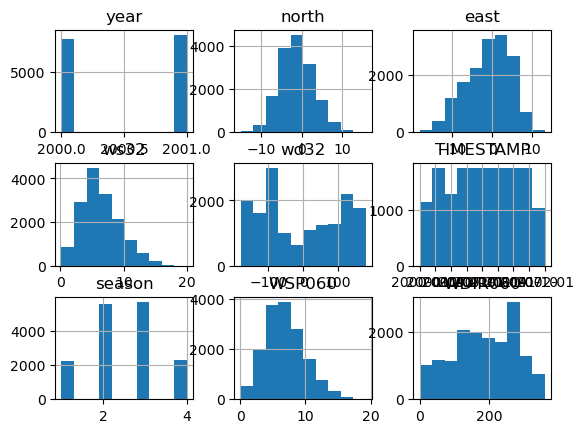

In [23]:
# cleaning the data, assuming that ws125=0.15 and wd125=0 is an error, remove all records with these value combinations
resultv1 = (df_result_cleaned.loc[(df_result_cleaned['ws32'] != 0.15) | (df_result_cleaned['wd32'] != 0)])

resultv1.hist()
print('')

In [24]:
# as a result of plotting the data, certain outliers will be removed

data_without_outliers = resultv1.copy()

data_without_outliers = data_without_outliers.loc[(data_without_outliers['ws32'] > 0.2)]
data_without_outliers

,year,north,east,ws32,wd32,TIMESTAMP,season,WSP060,WDIR060
15569,2000,-7.711142,-0.337232,7.718513,-177.495873,2000-01-01 07:00:00,1,9.12,193.41
15570,2000,-7.957040,0.114860,7.957869,179.172990,2000-01-01 08:00:00,1,9.10,191.73
15571,2000,-8.141119,0.163778,8.142766,178.847518,2000-01-01 09:00:00,1,9.13,206.20
15572,2000,-8.072268,-1.100040,8.146877,-172.239881,2000-01-01 10:00:00,1,8.24,228.57
15573,2000,-5.566095,-2.847045,6.251966,-152.910356,2000-01-01 11:00:00,1,9.78,290.79
...,...,...,...,...,...,...,...,...,...
31305,2001,2.610936,-1.946982,3.256950,-36.711996,2001-12-31 19:00:00,4,5.83,347.81
31306,2001,1.988047,-0.541898,2.060578,-15.247166,2001-12-31 20:00:00,4,4.83,72.59
31307,2001,2.098691,1.483328,2.569974,35.252186,2001-12-31 21:00:00,4,3.88,96.69
31308,2001,-0.266234,1.478775,1.502550,100.206002,2001-12-31 22:00:00,4,3.33,135.23


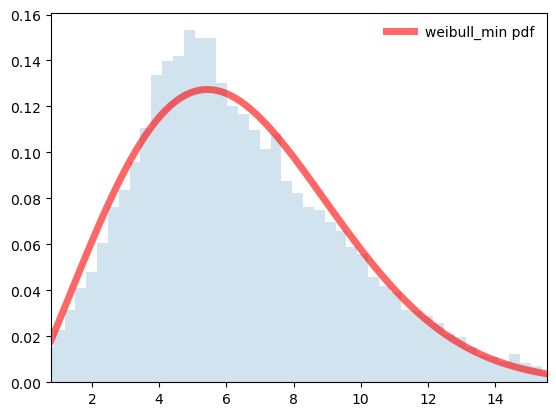

In [25]:
# check if ws follows weibull for mast windspeed

c, loc, scale = weibull_min.fit(data_without_outliers['ws32'].values)

fig, ax = plt.subplots(1, 1)
x = np.linspace(weibull_min.ppf(0.005, c,loc= loc, scale = scale),
                weibull_min.ppf(0.995, c, loc= loc, scale = scale), 100)
ax.plot(x, weibull_min.pdf(x, c, loc= loc, scale = scale),
       'r-', lw=5, alpha=0.6, label='weibull_min pdf')

ax.hist(data_without_outliers['ws32'].values, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

ax.set_xlim([x[0], x[-1]])

ax.legend(loc='best', frameon=False)

plt.show()

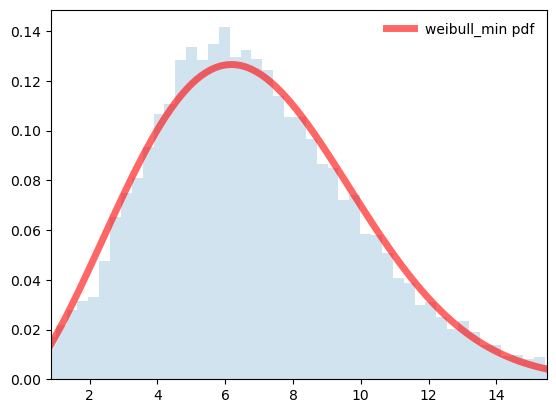

In [26]:
# check if ws follows weibull for meso windspeed

c, loc, scale = weibull_min.fit(data_without_outliers['WSP060'].values)
fig, ax = plt.subplots(1, 1)
x = np.linspace(weibull_min.ppf(0.005, c, loc= loc, scale = scale),
                weibull_min.ppf(0.995, c, loc=loc, scale = scale), 100)
ax.plot(x, weibull_min.pdf(x, c, loc= loc, scale = scale),
       'r-', lw=5, alpha=0.6, label='weibull_min pdf')

ax.hist(data_without_outliers['WSP060'].values, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

ax.set_xlim([x[0], x[-1]])

ax.legend(loc='best', frameon=False)

plt.show()

In [27]:
#drop the timestamp and checking the correlation of the data
data_without_outliers.corr()

data_without_outliersv2 = data_without_outliers.drop(['TIMESTAMP'], axis = 1)

my_corr = data_without_outliersv2.corr()
display(my_corr[(my_corr > 0.75) | (my_corr < -0.75)].dropna(thresh=2).dropna(thresh=2, axis=1))
display(my_corr)

data_without_outliersv2.corr()

,ws32,WSP060
ws32,1.000000,0.855486
WSP060,0.855486,1.000000


,year,north,east,ws32,wd32,season,WSP060,WDIR060
year,1.000000,0.134739,0.016256,-0.080262,-0.042884,-0.139415,-0.104507,-0.042208
north,0.134739,1.000000,-0.046978,-0.124503,-0.004427,-0.075637,-0.146044,-0.104065
east,0.016256,-0.046978,1.000000,-0.354878,0.703465,0.150804,-0.206601,-0.680307
ws32,-0.080262,-0.124503,-0.354878,1.000000,-0.148342,-0.079243,0.855486,0.198452
wd32,-0.042884,-0.004427,0.703465,-0.148342,1.000000,0.147277,-0.056349,-0.505609
season,-0.139415,-0.075637,0.150804,-0.079243,0.147277,1.000000,-0.047312,-0.061711
WSP060,-0.104507,-0.146044,-0.206601,0.855486,-0.056349,-0.047312,1.000000,0.113394
WDIR060,-0.042208,-0.104065,-0.680307,0.198452,-0.505609,-0.061711,0.113394,1.000000


,year,north,east,ws32,wd32,season,WSP060,WDIR060
year,1.000000,0.134739,0.016256,-0.080262,-0.042884,-0.139415,-0.104507,-0.042208
north,0.134739,1.000000,-0.046978,-0.124503,-0.004427,-0.075637,-0.146044,-0.104065
east,0.016256,-0.046978,1.000000,-0.354878,0.703465,0.150804,-0.206601,-0.680307
ws32,-0.080262,-0.124503,-0.354878,1.000000,-0.148342,-0.079243,0.855486,0.198452
wd32,-0.042884,-0.004427,0.703465,-0.148342,1.000000,0.147277,-0.056349,-0.505609
season,-0.139415,-0.075637,0.150804,-0.079243,0.147277,1.000000,-0.047312,-0.061711
WSP060,-0.104507,-0.146044,-0.206601,0.855486,-0.056349,-0.047312,1.000000,0.113394
WDIR060,-0.042208,-0.104065,-0.680307,0.198452,-0.505609,-0.061711,0.113394,1.000000


# 2. Model development

# 2.1 Wind speed analysis

First lets do Linear regression model. 

To predict future data based on past data we are going to use time series split from sklearn. We are going to create models to predict wind speed and wind direction.

In [45]:
from sklearn.model_selection import TimeSeriesSplit

# first lets build model for wind speed
tscv = TimeSeriesSplit(n_splits=5)
X = data_without_outliersv2.drop(columns=['ws32'])
y = data_without_outliersv2['ws32']


for train_index, test_index in tscv.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")

    print("Train set:")
    display(X_train.head())

    print("Test set:")
    display(X_test.head())

Train set size: 2626
Test set size: 2622
Train set:


,year,north,east,wd32,season,WSP060,WDIR060
15569,2000,-7.711142,-0.337232,-177.495873,1,9.12,193.41
15570,2000,-7.957040,0.114860,179.172990,1,9.10,191.73
15571,2000,-8.141119,0.163778,178.847518,1,9.13,206.20
15572,2000,-8.072268,-1.100040,-172.239881,1,8.24,228.57
15573,2000,-5.566095,-2.847045,-152.910356,1,9.78,290.79


Test set:


,year,north,east,wd32,season,WSP060,WDIR060
18195,2000,-1.515665,-3.926754,-111.105794,2,3.34,237.36
18196,2000,-0.964455,-4.744530,-101.490367,2,3.26,236.36
18197,2000,-0.867751,-4.999923,-99.845778,2,3.04,242.79
18198,2000,-1.055220,-5.533331,-100.796806,2,2.89,252.74
18199,2000,-0.747996,-5.135418,-98.287099,2,2.71,264.99


Train set size: 5248
Test set size: 2622
Train set:


,year,north,east,wd32,season,WSP060,WDIR060
15569,2000,-7.711142,-0.337232,-177.495873,1,9.12,193.41
15570,2000,-7.957040,0.114860,179.172990,1,9.10,191.73
15571,2000,-8.141119,0.163778,178.847518,1,9.13,206.20
15572,2000,-8.072268,-1.100040,-172.239881,1,8.24,228.57
15573,2000,-5.566095,-2.847045,-152.910356,1,9.78,290.79


Test set:


,year,north,east,wd32,season,WSP060,WDIR060
20818,2000,-1.444186,5.222180,105.458699,3,9.77,116.23
20819,2000,-0.378516,7.247924,92.989503,3,10.20,118.62
20820,2000,0.135970,8.794666,89.114248,3,9.74,118.28
20821,2000,-0.914554,7.268479,97.171536,3,9.20,116.00
20822,2000,-0.014754,4.955867,90.170576,3,9.22,112.93


Train set size: 7870
Test set size: 2622
Train set:


,year,north,east,wd32,season,WSP060,WDIR060
15569,2000,-7.711142,-0.337232,-177.495873,1,9.12,193.41
15570,2000,-7.957040,0.114860,179.172990,1,9.10,191.73
15571,2000,-8.141119,0.163778,178.847518,1,9.13,206.20
15572,2000,-8.072268,-1.100040,-172.239881,1,8.24,228.57
15573,2000,-5.566095,-2.847045,-152.910356,1,9.78,290.79


Test set:


,year,north,east,wd32,season,WSP060,WDIR060
23440,2001,-7.918883,-3.352867,-157.052128,1,8.24,213.27
23441,2001,-8.181105,-3.258449,-158.283121,1,8.30,212.87
23442,2001,-8.121866,-3.651391,-155.792492,1,7.88,216.33
23443,2001,-8.540354,-4.565332,-151.872821,1,7.55,213.33
23444,2001,-8.365083,-4.032665,-154.262068,1,8.35,214.38


Train set size: 10492
Test set size: 2622
Train set:


,year,north,east,wd32,season,WSP060,WDIR060
15569,2000,-7.711142,-0.337232,-177.495873,1,9.12,193.41
15570,2000,-7.957040,0.114860,179.172990,1,9.10,191.73
15571,2000,-8.141119,0.163778,178.847518,1,9.13,206.20
15572,2000,-8.072268,-1.100040,-172.239881,1,8.24,228.57
15573,2000,-5.566095,-2.847045,-152.910356,1,9.78,290.79


Test set:


,year,north,east,wd32,season,WSP060,WDIR060
26065,2001,-0.863033,-3.088830,-105.610604,2,4.18,294.42
26066,2001,-1.728939,-3.755066,-114.722683,2,3.76,303.45
26067,2001,-0.021495,-3.209472,-90.383728,2,3.33,297.99
26068,2001,0.755604,-2.817465,-74.987358,2,1.79,293.08
26069,2001,0.813164,-1.398843,-59.830044,2,1.09,304.75


Train set size: 13114
Test set size: 2622
Train set:


,year,north,east,wd32,season,WSP060,WDIR060
15569,2000,-7.711142,-0.337232,-177.495873,1,9.12,193.41
15570,2000,-7.957040,0.114860,179.172990,1,9.10,191.73
15571,2000,-8.141119,0.163778,178.847518,1,9.13,206.20
15572,2000,-8.072268,-1.100040,-172.239881,1,8.24,228.57
15573,2000,-5.566095,-2.847045,-152.910356,1,9.78,290.79


Test set:


,year,north,east,wd32,season,WSP060,WDIR060
28688,2001,-2.924659,-2.905745,-135.185868,3,5.09,221.02
28689,2001,-2.858240,-2.535041,-138.429418,3,4.85,226.32
28690,2001,-2.691372,-2.167095,-141.158948,3,4.37,231.96
28691,2001,-3.729048,-1.880240,-153.242101,3,4.13,237.50
28692,2001,-3.135161,-1.997703,-147.494989,3,3.93,211.12


In [46]:
# Now we can scale our data to avoid data leakage
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Lets start with ordinary least squares regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()

regressor.fit(X_train_scaled, y_train)
preds_train = regressor.predict(X_train_scaled)
preds_test = regressor.predict(X_test_scaled)

print(f"MSE on train: {mean_squared_error(y_train, preds_train)}")
print(f"MSE on test: {mean_squared_error(y_test, preds_test)}")
print(f"R^2 score on train: {regressor.score(X_train_scaled, y_train)}")
print(f"R^2 score on test: {regressor.score(X_test_scaled, y_test)}")

MSE on train: 2.108930084378702
MSE on test: 2.5886854545022135
R^2 score on train: 0.774623159583372
R^2 score on test: 0.7350552709357939


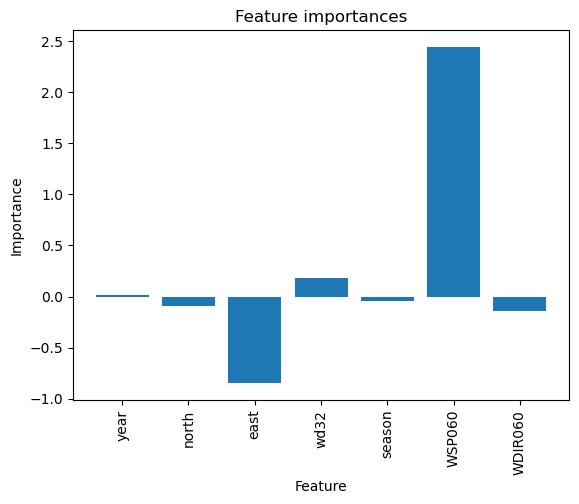

In [49]:
def plot_feature_importances(regressor):

    feature_importances = regressor.coef_
    plt.bar(X.columns, feature_importances)
    plt.xticks(rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature importances')
    plt.show()

plot_feature_importances(regressor)

Lasso regression

In [50]:
alphas = 10**np.linspace(10,-2,100)*0.5
cv = LassoCV(alphas = alphas, cv=5)

cv.fit(X_train, y_train)

best_alpha = cv.alpha_

print(f"Best alpha: {best_alpha}")

Best alpha: 0.06164233697210317


In [52]:
regressor = Lasso(alpha=best_alpha)

regressor.fit(X_train_scaled, y_train)
preds_train = regressor.predict(X_train_scaled)
preds_test = regressor.predict(X_test_scaled)

print(f"MSE on train: {mean_squared_error(y_train, preds_train)}")
print(f"MSE on test: {mean_squared_error(y_test, preds_test)}")
print(f"R^2 score on train: {regressor.score(X_train_scaled, y_train)}")
print(f"R^2 score on test: {regressor.score(X_test_scaled, y_test)}")


MSE on train: 2.1464133332334727
MSE on test: 2.5919359077172426
R^2 score on train: 0.7706174050740058
R^2 score on test: 0.7347225961239916


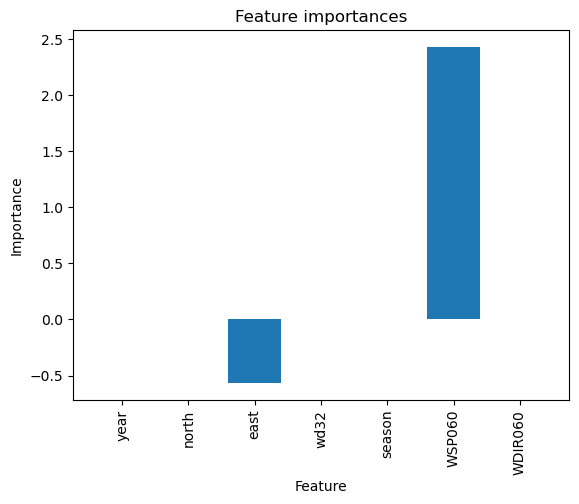

In [53]:
plot_feature_importances(regressor)

Ridge regression

In [54]:
alphas = 10**np.linspace(10,-2,100)*0.5
cv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', cv=5)
cv.fit(X_train, y_train)

best_alpha = cv.alpha_

print(f"Best alpha: {best_alpha}")

Best alpha: 814.8754173103217


In [55]:
regressor = Ridge(alpha=best_alpha)

regressor.fit(X_train_scaled, y_train)
preds_train = regressor.predict(X_train_scaled)
preds_test = regressor.predict(X_test_scaled)

print(f"MSE on train: {mean_squared_error(y_train, preds_train)}")
print(f"MSE on test: {mean_squared_error(y_test, preds_test)}")
print(f"R^2 score on train: {regressor.score(X_train_scaled, y_train)}")
print(f"R^2 score on test: {regressor.score(X_test_scaled, y_test)}")

MSE on train: 2.1335859512984143
MSE on test: 2.6281092051153307
R^2 score on train: 0.7719882399028865
R^2 score on test: 0.7310203601254747


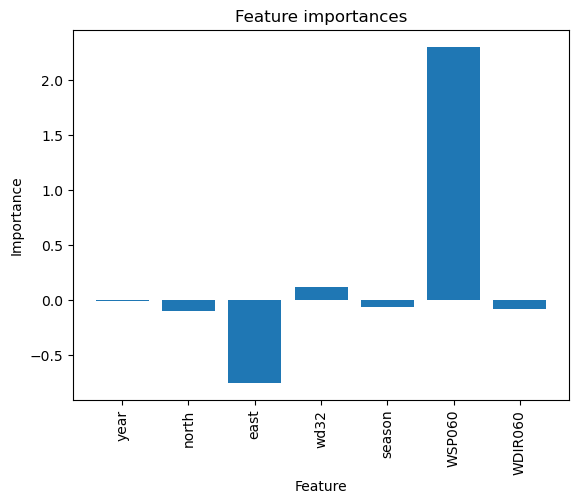

In [56]:
plot_feature_importances(regressor)

The models can explain around 73% of variance in data. No matter which regression model we used, the results were almost identical, which could be impacted by the amount of features that we were working with. The important features when predicting the mast wind speed were the 'east' direction and the meso wind speed.  

# 2.2 Wind direction analysis

Linear regression

In [57]:
# first lets build model for wind speed
tscv = TimeSeriesSplit(n_splits=5)
X = data_without_outliersv2.drop(columns=['wd32'])
y = data_without_outliersv2['wd32']


for train_index, test_index in tscv.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [58]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
regressor = LinearRegression()

regressor.fit(X_train_scaled, y_train)

preds_train = regressor.predict(X_train_scaled)
preds_test = regressor.predict(X_test_scaled)

print(f"MSE on train: {mean_squared_error(y_train, preds_train)}")
print(f"MSE on test: {mean_squared_error(y_test, preds_test)}")
print(f"R^2 score on train: {regressor.score(X_train_scaled, y_train)}")
print(f"R^2 score on test: {regressor.score(X_test_scaled, y_test)}")

MSE on train: 6297.8741681014835
MSE on test: 6197.693242055583
R^2 score on train: 0.5159239065991854
R^2 score on test: 0.48703396388178577


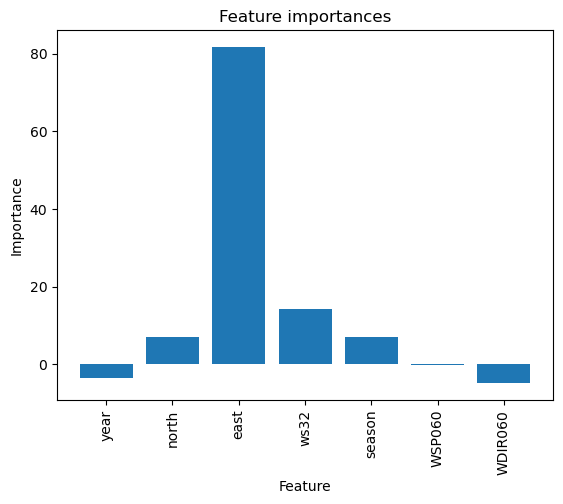

In [61]:
plot_feature_importances(regressor)

Lasso regression

In [63]:
cv = LassoCV(alphas = alphas, cv=5)

cv.fit(X_train, y_train)

best_alpha = cv.alpha_

print(f"Best alpha: {best_alpha}")

Best alpha: 0.005


In [64]:
regressor = Lasso(alpha=best_alpha)
regressor.fit(X_train_scaled, y_train)

preds_train = regressor.predict(X_train_scaled)
preds_test = regressor.predict(X_test_scaled)

print(f"MSE on train: {mean_squared_error(y_train, preds_train)}")
print(f"MSE on test: {mean_squared_error(y_test, preds_test)}")
print(f"R^2 score on train: {regressor.score(X_train_scaled, y_train)}")
print(f"R^2 score on test: {regressor.score(X_test_scaled, y_test)}")

MSE on train: 6297.874740919976
MSE on test: 6197.562423933481
R^2 score on train: 0.5159238625704019
R^2 score on test: 0.4870447913382161


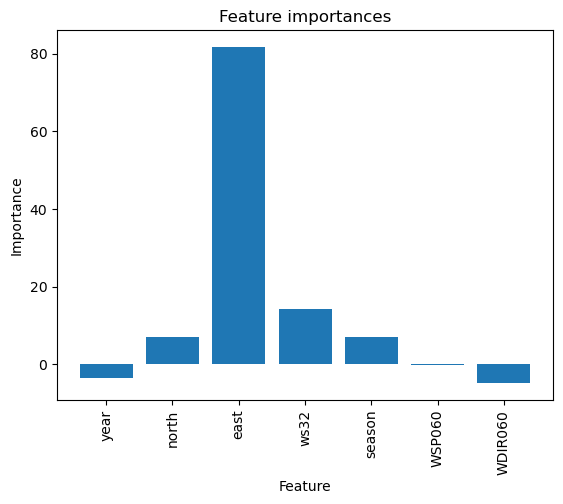

In [65]:
plot_feature_importances(regressor)

Ridge regression

In [66]:
cv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', cv=5)

cv.fit(X_train, y_train)

best_alpha = cv.alpha_

print(f"Best alpha: {best_alpha}")

Best alpha: 201.85086292982749


In [67]:
regressor = Ridge(alpha=best_alpha)

regressor.fit(X_train_scaled, y_train)

preds_train = regressor.predict(X_train_scaled)

preds_test = regressor.predict(X_test_scaled)

print(f"MSE on train: {mean_squared_error(y_train, preds_train)}")
print(f"MSE on test: {mean_squared_error(y_test, preds_test)}")
print(f"R^2 score on train: {regressor.score(X_train_scaled, y_train)}")
print(f"R^2 score on test: {regressor.score(X_test_scaled, y_test)}")

MSE on train: 6301.606609118404
MSE on test: 6203.342379647059
R^2 score on train: 0.5156370184496141
R^2 score on test: 0.4865664002892346


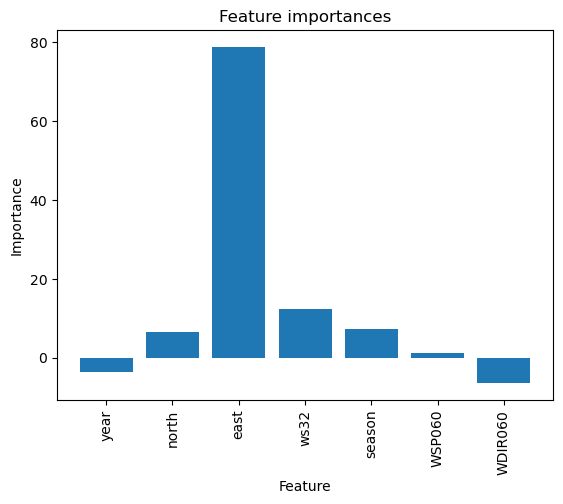

In [68]:
plot_feature_importances(regressor)

When it comes to predicting the wind direction, the most important feature was 'east' as it had the most positive influence over the speed direction. However, only 49% of data variance is explained regardless of which model is used.